In [2]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# dataframes creation for both training and testing datasets
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [ ]:
fashion_train_df.head()

In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
# Create training and testing arrays
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')

In [9]:
train.shape

(60000, 785)

In [10]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Let's view some images!
i = random.randint(1,6000) # select any random index from 1 to 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape and plot the image

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

Text(0.5, 1.0, 'Sneaker')

In [13]:
label = train[i,0]
label

7.0

In [14]:

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [15]:
# Prepare the training and testing dataset
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

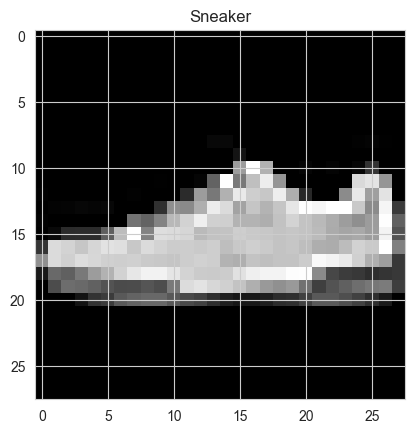

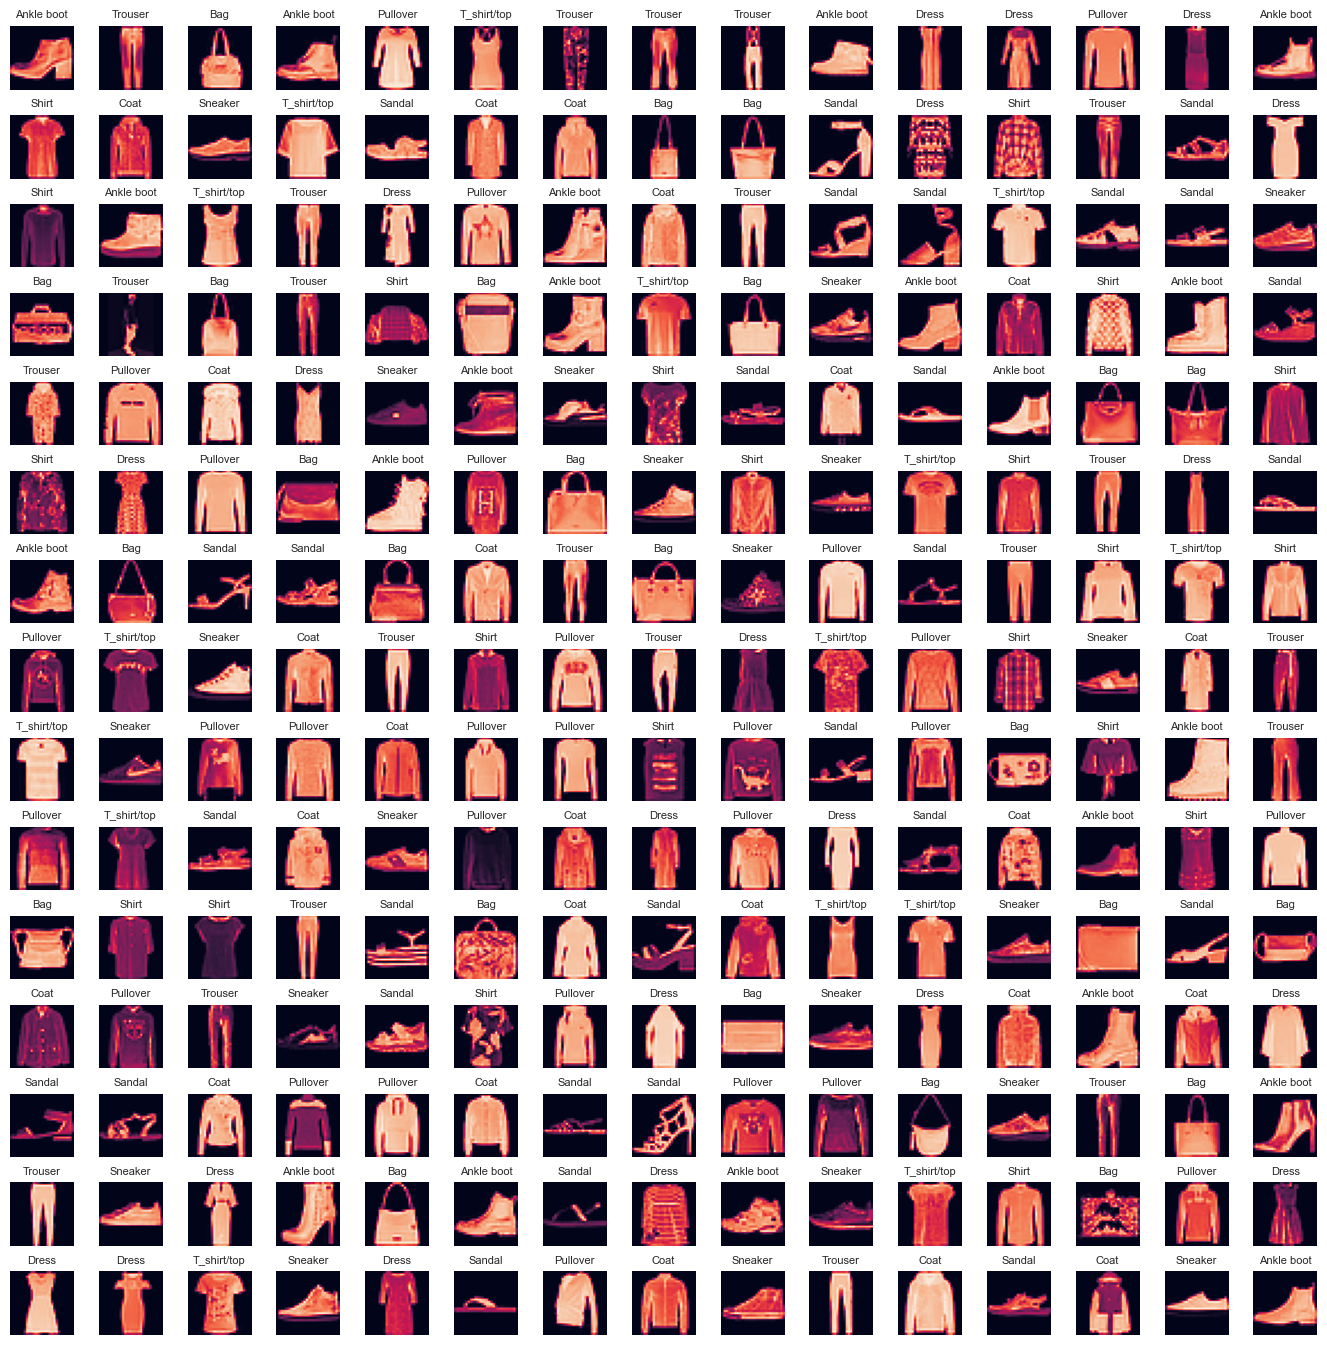

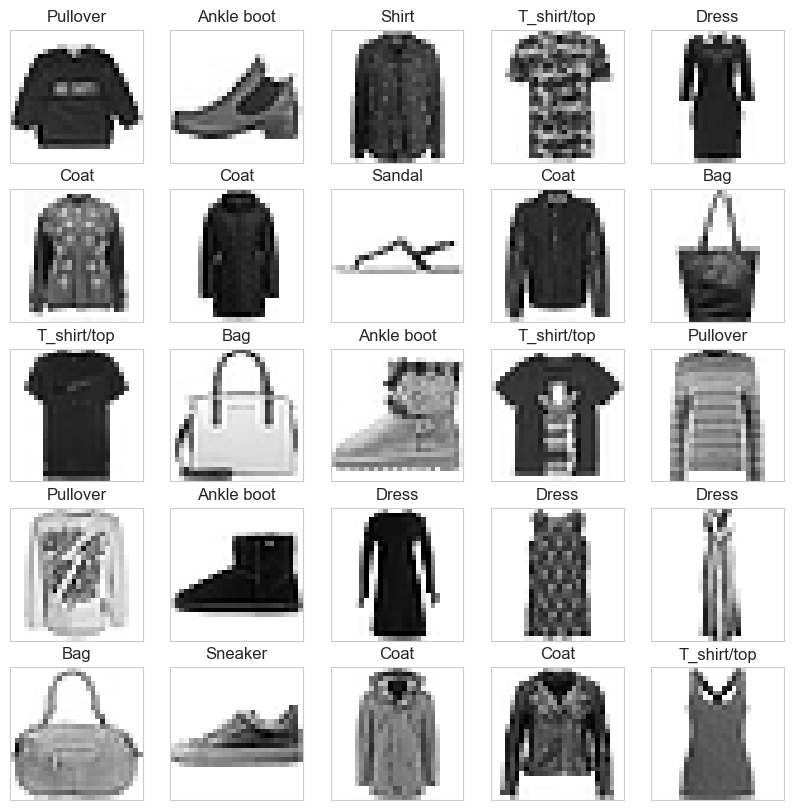

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

Text(0.5, 1.0, 'Class distribution in testing set')

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [20]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


In [22]:
import keras
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

C:\Users\rohan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [28]:
epochs = 20
batch_size = 512

history = cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8867 - loss: 0.3095 - val_accuracy: 0.3369 - val_loss: 2.4920
Epoch 2/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8996 - loss: 0.2754 - val_accuracy: 0.3746 - val_loss: 2.2659
Epoch 3/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9083 - loss: 0.2497 - val_accuracy: 0.6447 - val_loss: 1.2136
Epoch 4/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9149 - loss: 0.2244 - val_accuracy: 0.8309 - val_loss: 0.4763
Epoch 5/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9216 - loss: 0.2101 - val_accuracy: 0.9169 - val_loss: 0.2327
Epoch 6/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.9265 - loss: 0.1985 - val_accuracy: 0.9119 - val_loss: 0.2516
Epoch 7/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9291 - loss: 0.1896 - val_accuracy: 0.9237 - val_loss: 0.2171
Epoch 8/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9354 - loss: 0.1745 - val_accuracy: 0.9281 - val_loss:

In [29]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

Text(0.5, 1.0, 'Accuracy evolution')

In [30]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.9251 - loss: 0.2108
Test Accuracy : 0.928
